In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
#Reading the German Dataset
German_dataset = pd.read_csv("german_credit_data.csv",index_col=0)

# Cleaning the Dataset

In [49]:
#looking at rows of the data
German_dataset.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,NaN,NaN,9055,36,education,good
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


In [50]:
#checking the types of data
German_dataset.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [51]:
#checking unique values
German_dataset.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

In [52]:
#Checking for null values
German_dataset[German_dataset.isna().any(axis=1)]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
2,49,male,1,own,little,NaN,2096,12,education,good
5,35,male,1,free,NaN,NaN,9055,36,education,good
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
...,...,...,...,...,...,...,...,...,...,...
991,34,male,1,own,moderate,NaN,1569,15,radio/TV,good
992,23,male,1,rent,NaN,little,1936,18,radio/TV,good
994,50,male,2,own,NaN,NaN,2390,12,car,good
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good


In [53]:
German_dataset.dropna(inplace=True)

In [56]:
German_dataset[German_dataset['Risk'] == 'good']

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
12,22,female,2,own,little,moderate,1567,12,radio/TV,good
14,28,female,2,rent,little,little,1403,15,car,good
21,44,male,2,rent,quite rich,little,2647,6,radio/TV,good
...,...,...,...,...,...,...,...,...,...,...
988,29,male,3,free,little,little,6579,24,car,good
989,48,male,1,own,little,moderate,1743,24,radio/TV,good
993,30,male,3,own,little,little,3959,36,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good


In [57]:
def new_column(x):
    if x == 'good':
        return 1
    else:
        return 0

In [58]:
German_dataset['Risk'] = German_dataset['Risk'].apply(lambda x:new_column(x))

In [59]:
German_dataset['Risk']

1      0
3      1
4      0
7      1
9      0
      ..
989    1
993    1
996    1
998    0
999    1
Name: Risk, Length: 522, dtype: int64

# Exploring the Data

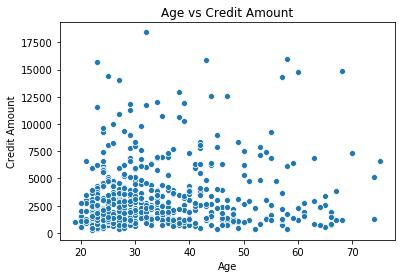

In [33]:
#Relationship between Age and Credit Amount
sns.scatterplot(German_dataset['Age'],German_dataset['Credit amount'])
plt.xlabel('Age')
plt.ylabel('Credit Amount')
plt.title('Age vs Credit Amount')
plt.show()

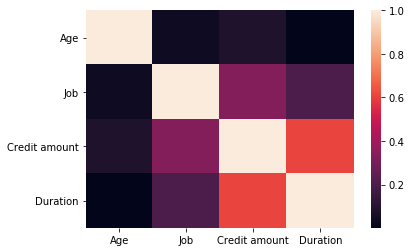

In [34]:
#Relationship between different Numerical Attribues of the Dataset
sns.heatmap(German_dataset.corr())

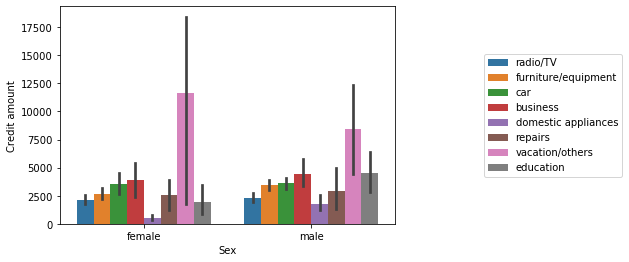

In [36]:
sns.barplot(German_dataset['Sex'],German_dataset['Credit amount'],hue=German_dataset['Purpose'])
plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

# Answering the Initial Questions

In [63]:
#Question 1 Affect of variables on the Customer Credit Risk
#less p-value (p-value < 0.05) shows that the evidence is strong.
import scipy.stats
scipy.stats.pearsonr(German_dataset['Age'], German_dataset['Risk'])[1] 

0.20055139624426885

In [64]:
scipy.stats.pearsonr(German_dataset['Job'], German_dataset['Risk'])[1] 

0.2584044202821672

In [66]:
scipy.stats.pearsonr(German_dataset['Credit amount'], German_dataset['Risk'])[1] 

2.4893047988537765e-05

In [67]:
scipy.stats.pearsonr(German_dataset['Duration'], German_dataset['Risk'])[1] 

7.726103527645042e-12

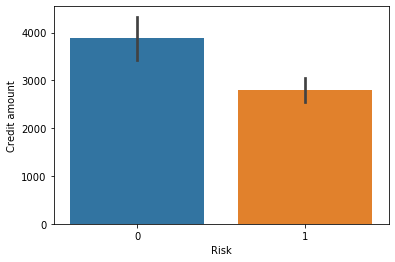

In [75]:
#Question 2 which customers have high credit amounts?
sns.barplot(German_dataset['Risk'],German_dataset['Credit amount'])

Risk 0 -> 'bad'


Risk 1 -> 'Good'

The above chart Shows that the 'bad' profile customers have higher credit amounts as compared to the 'good' profile customers.


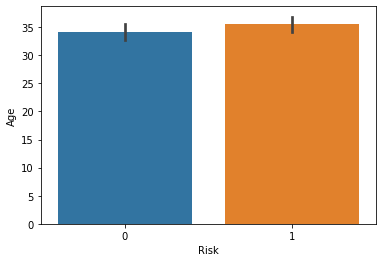

In [77]:
sns.barplot(German_dataset['Risk'],German_dataset['Age'])

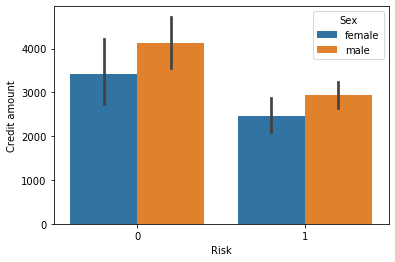

In [79]:
#Question 3 How Male customers are different from Female Customers?
sns.barplot(German_dataset['Risk'],German_dataset['Credit amount'],hue=German_dataset['Sex'])

Male customers with bad profile have higher amount of credit as compared to the female.